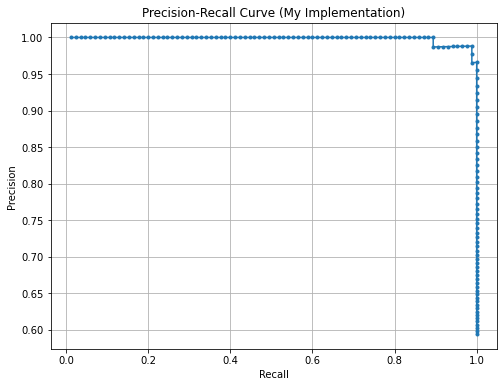

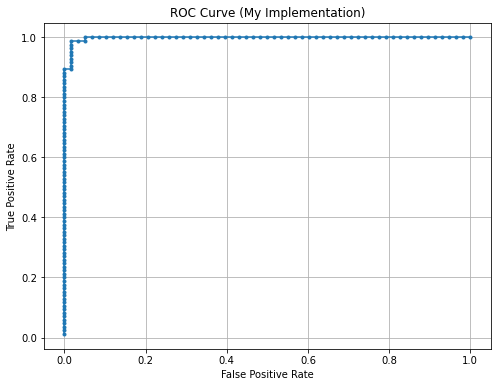

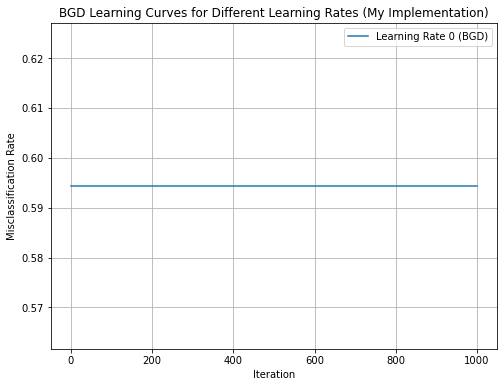

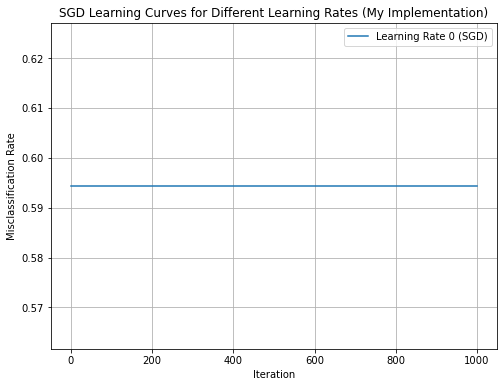

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split # split dataset into subsets
from sklearn.preprocessing import StandardScaler # standardizing the dataset
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, roc_curve, precision_recall_curve, auc

# loading the dataset
data = load_breast_cancer()
X = data.data
y = data.target

np.random.seed(2782) # seed for pseudo number generator - 4 digits of student number

# separate the test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=2782)

# standardize the features
scale = StandardScaler() 
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)


# MY IMPLEMENTATION
class LogisticRegression_imp():
    
    def __init__(self, learning_rate, iteration, batch_size):
        self.learning_rate = learning_rate
        self.iteration = iteration
        self.batch_size = batch_size
        self.W = None
        self.b = None
        
        
    # model training    
    def fit (self, X_train, y_train):
        self.samples, self.features = X_train.shape # number of training examples and features
        self.W = np.zeros(self.features) # weight
        self.b = 0 # bias
        self.X = X_train
        self.y = y_train
        self.misclassification_rates = []
        
        
        # training with gradient descent
        for epoch in range(self.iteration):
            
            BDG_dW, BDG_db = self.BGD()
            SGD_dW, SGD_db = self.SGD()
                
            self.W -= self.learning_rate * BDG_dW
            self.b -= self.learning_rate * BDG_db 
            
            diff_weights = np.linalg.norm(self.W - (self.W - self.learning_rate * SGD_dW))

            
    def BGD(self):
        
        linear_model = np.dot (self.X, self.W) + self.b # approximation of y
        y_pred = self.sigmoid(self.X, self.W, self.b) # calling sigmoid function
        
        # calculate gradients
        dW = (1 / self.samples) * np.dot(self.X.T, (y_pred - self.y))
        db = (1 / self.samples) * np.sum(y_pred - self.y)
        
        return dW, db
    
    def SGD(self):
        
        dW = np.zeros(self.features)
        db = 0
        
        for i in range(self.samples):
            
            x_i = self.X[i, :]
            y_i = self.y[i]
        
            linear_model = np.dot (x_i, self.W) + self.b # approximation of y
            y_pred = self.sigmoid(x_i, self.W, self.b) # calling sigmoid function
        
            # calculate gradients per iteration and increment
            dW_i = x_i * (y_pred - y_i)
            db_i = y_pred - y_i
        
            
            dW += dW_i
            db += db_i
        
        # average gradient
        dW /= self.samples
        db /= self.samples
        
        return dW, db
    
    #sigmoid function
    def sigmoid(self,X, W, b):
        Z = 1 / ( 1 + np.exp(-(X.dot(self.W) + self.b)))
        return Z
    
    def predict(self, X):
        linear_model = np.dot (X, self.W) + self.b  # approximation of y
        y_pred = self.sigmoid(X, self.W, self.b)
        y = np.where(y_pred > 0.5, 1, 0)
        return np.array(y)
    
    
# computing misclassification rate and F1 score on the test data using Bayes Classifier

# train logistic regression model

logreg_model = LogisticRegression_imp(learning_rate=0.01, iteration=1000, batch_size=len(X_train))
logreg_model.fit(X_train, y_train)

# calculate predicted probabilities
predicted_prob = logreg_model.sigmoid(X_test, logreg_model.W, logreg_model.b)


# threshold to use for classification
threshold = 0.5

# calculating misclassification rate
predicted_label = (predicted_prob > threshold).astype(int)
#misclassification_rate = 1 - np.mean(predicted_label == y_test)


#calculate F1 score
def f1_score(y_true, y_pred): # GET RID
    
    true_pos = np.sum((y_true == 1) & (y_pred == 1))
    false_pos = np.sum((y_true == 0) & (y_pred == 1))
    false_neg = np.sum((y_true == 1) & (y_pred == 0))
    positives = true_pos + false_neg
    
    precision = true_pos/(true_pos + false_pos)
    recall = true_pos/(positives)
    
    f1 = 2 * (precision * recall)/(precision + recall)
    
    return f1

f1 = f1_score(y_test, predicted_label)

# considering all possible thresholds
z_sorted = np.sort(predicted_prob)
thresholds = z_sorted
precision_values = [] # precision values array
recall_values = [] # recall values array
false_posrate_values = [] # false positive rate values for each threshold
true_posrate_values = [] # true positive rate values for each threshold

for threshold in thresholds:
    predicted_labels = (predicted_prob >= threshold).astype(int)
    true_pos = np.sum((predicted_labels == 1) & (y_test == 1))
    false_pos = np.sum((predicted_labels == 1) & (y_test == 0))
    true_neg = np.sum((predicted_labels == 0) & (y_test == 0))
    false_neg = np.sum((predicted_labels == 0) & (y_test == 1))
    
    # calculating precision, recall, false positive rate, and true positive rate
    precision = true_pos/(true_pos + false_pos)
    recall = true_pos / (true_pos + false_neg)
    false_posrate = false_pos / (false_pos + true_neg)
    true_posrate = true_pos / (true_pos + false_neg)
    
    f1 = 2 * (precision * recall)/(precision + recall)
    
    # appending to lists
    precision_values.append(precision)
    recall_values.append(recall)
    false_posrate_values.append(false_posrate)
    true_posrate_values.append(true_posrate) 

# plotting precision recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_values, precision_values, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (My Implementation)')
plt.grid()
plt.show()

# plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(false_posrate_values, true_posrate_values, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (My Implementation)')
plt.grid()
plt.show()


# learning rates (α1, α2, α3)
learning_rates = [0, 0, 0]

# learning curves for different learning rates
learning_curves_bgd = {}
learning_curves_sgd = {}


for learning_rate in learning_rates:
    logreg_model_bgd = LogisticRegression_imp(learning_rate=learning_rate, iteration=1000, batch_size=len(X_train))
    logreg_model_sgd = LogisticRegression_imp(learning_rate=learning_rate, iteration=1000, batch_size=32)
    
    logreg_model_bgd.fit(X_train, y_train)
    logreg_model_sgd.fit(X_train, y_train)
    
    # Initialize arrays to store misclassification rates at each iteration
    misclassification_rates_bgd = []
    misclassification_rates_sgd = []

    for epoch in range(logreg_model_bgd.iteration):
        
        # calculate predicted probabilities for BGD and SGD
        predicted_prob_bgd = logreg_model_bgd.sigmoid(X_test, logreg_model_bgd.W, logreg_model_bgd.b)
        predicted_prob_sgd = logreg_model_sgd.sigmoid(X_test, logreg_model_sgd.W, logreg_model_sgd.b)

        # threshold for classification
        threshold = 0.5

        # calculating misclassification rates for BGD and SGD
        predicted_labels_bgd = logreg_model_bgd.predict(X_test)
        predicted_labels_sgd = logreg_model_sgd.predict(X_test)
        misclassification_rate_bgd = 1 - np.mean(predicted_labels_bgd == y_test)
        misclassification_rate_sgd = 1 - np.mean(predicted_labels_sgd == y_test)

        # appending misclassification rates for BGD and SGD
        misclassification_rates_bgd.append(misclassification_rate_bgd)
        misclassification_rates_sgd.append(misclassification_rate_sgd)

    # learning curves for the current learning rate for BGD and SGD storing
    learning_curves_bgd[f'Learning Rate {learning_rate} (BGD)'] = misclassification_rates_bgd
    learning_curves_sgd[f'Learning Rate {learning_rate} (SGD)'] = misclassification_rates_sgd

# Plot learning curves for BGD
plt.figure(figsize=(8, 6))
for learning_rate, curve in learning_curves_bgd.items():
    plt.plot(range(len(curve)), curve, label=learning_rate)
plt.xlabel('Iteration')
plt.ylabel('Misclassification Rate')
plt.title('BGD Learning Curves for Different Learning Rates (My Implementation)')
plt.legend()
plt.grid()
plt.show()

# Plot learning curves for SGD
plt.figure(figsize=(8, 6))
for learning_rate, curve in learning_curves_sgd.items():
    plt.plot(range(len(curve)), curve, label=learning_rate)
plt.xlabel('Iteration')
plt.ylabel('Misclassification Rate')
plt.title('SGD Learning Curves for Different Learning Rates (My Implementation)')
plt.legend()
plt.grid()
plt.show()

In [26]:
#print(thresholds)
print(logreg_model.W)

[-0.37009112 -0.37635876 -0.36899092 -0.36453723 -0.13978929 -0.13566178
 -0.2874063  -0.38318474 -0.08255875  0.15300886 -0.29315912 -0.00534151
 -0.25370902 -0.27832749 -0.00464782  0.08585849  0.09742456 -0.02013185
  0.05611913  0.17733076 -0.45360614 -0.45462439 -0.43910079 -0.42920793
 -0.33092617 -0.22599294 -0.28176442 -0.40836143 -0.32039174 -0.12476189]


In [32]:
print(f1, misclassification_rate_sgd)

0.023255813953488372 0.5944055944055944


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, precision_recall_curve, roc_curve, auc

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Set a random seed for reproducibility
np.random.seed(2782)

# Separate the test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2782)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SCIKIT-LEARN IMPLEMENTATION

# training logistic regression classifier
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# predictions on test data
y_pred = logreg_model.predict(X_test)

#misclassification rate and F1 score
misclassification_rate = 1 - np.mean(y_pred == y_test)
f1 = f1_score(y_test, y_pred)


predicted_prob = logreg_model.predict_proba(X_test)[:,1]

precision, recall, _ = precision_recall_curve(y_test, predicted_prob)
false_pos_rate, true_pos_rate, _ = roc_curve(y_test, predicted_prob)

# AUC calculation for the ROC curve
roc_auc = auc(false_pos_rate, true_pos_rate)

# precision-recall curve plot
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (scikit-learn Implementation)')
plt.grid()
plt.show()

# ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot(false_pos_rate, true_pos_rate, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC (scikit-learn Implementation)')
plt.grid()
plt.show()

In [ ]:
print(f1, misclassification_rate)
print(logreg_model.coef_)

In [ ]:
print(y)

In [ ]:
print(y_test)

0.018779342723004744


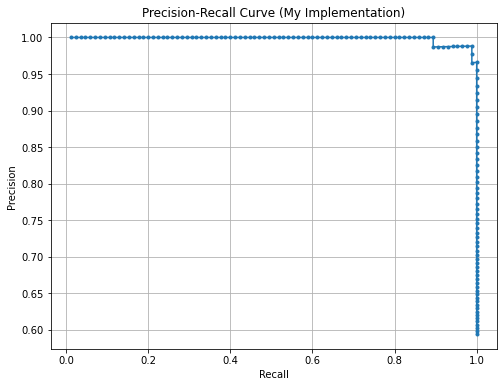

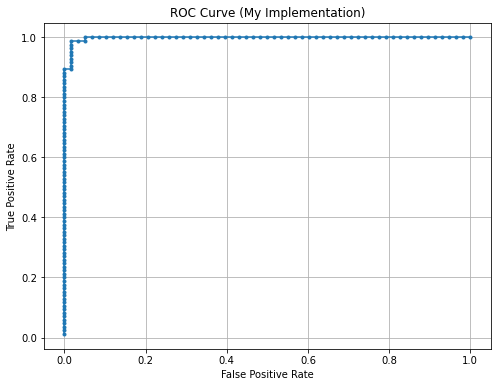

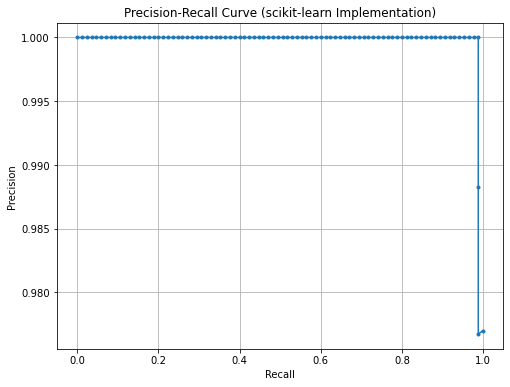

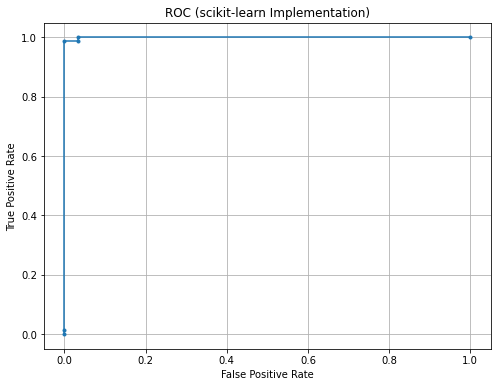

0.04929577464788737
0.018779342723004744
0.016431924882629123


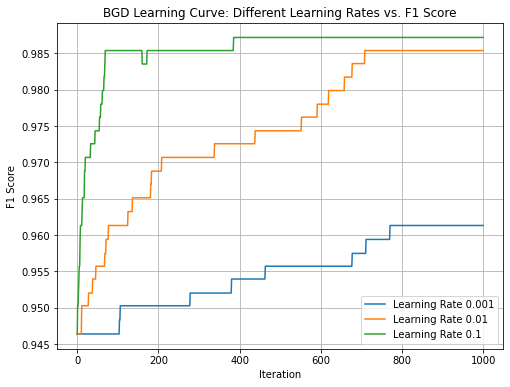

0.018779342723004744
0.016431924882629123
0.014084507042253502


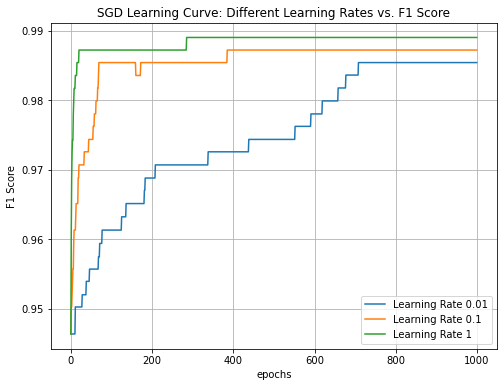

0.04929577464788737
0.018779342723004744
0.016431924882629123


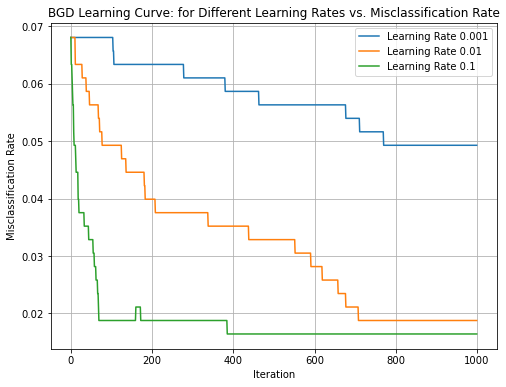

0.018779342723004744
0.016431924882629123
0.014084507042253502


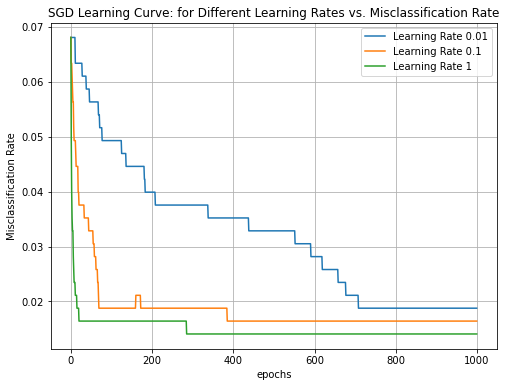

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split # split dataset into subsets
from sklearn.preprocessing import StandardScaler # standardizing the dataset
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, precision_recall_curve, roc_curve, auc



# MY IMPLEMENTATION
class LogisticRegression_imp():
    
    def __init__(self, learning_rate, iteration, batch_size):
        self.learning_rate = learning_rate
        self.iteration = iteration
        self.batch_size = batch_size
        self.W = None
        self.b = None
        self.f1_scores = []  # empty list for F1 scores - learning curve 
        self.misclassification_rates = []  # empty list for misclassification rates - learning curve 

    # model training    
    def fit(self, X_train, y_train):
        self.samples, self.features = X_train.shape # number of training examples and features
        self.W = np.zeros(self.features) # weight
        self.b = 0 # bias
        self.X = X_train
        self.y = y_train

        # training with gradient descent
        for epoch in range(self.iteration):
            BDG_dW, BDG_db = self.BGD()
            SGD_dW, SGD_db = self.SGD()
            self.W -= self.learning_rate * BDG_dW
            self.b -= self.learning_rate * BDG_db
            diff_weights = np.linalg.norm(self.W - (self.W - self.learning_rate * SGD_dW))
            
            # calculating F1 score
            y_pred = self.predict(X_train)
            f1 = f1_score(y_train, y_pred)
            self.f1_scores.append(f1) # appending f1 scores to list
            
            # calculating misclassification rate
            y_pred = self.predict(X_train)
            misclassification_rate = 1 - np.mean(y_pred == y_train)
            self.misclassification_rates.append(misclassification_rate)
            
            
        self.W = self.W  
        self.b = self.b
        print(misclassification_rate)        
    #BGD model training       
    def BGD(self):
        
        linear_model = np.dot(self.X, self.W) + self.b # approximation of y
        y_pred = self.sigmoid(self.X, self.W, self.b) # calling sigmoid function for predictions
        
        # calculate gradients
        dW = (1 / self.samples) * np.dot(self.X.T, (y_pred - self.y))
        db = (1 / self.samples) * np.sum(y_pred - self.y)
        
        return dW, db
    
    
    #SGD model training  
    def SGD(self):
        
        dW = np.zeros(self.features)
        db = 0
        
        for i in range(self.samples):
            
            x_i = self.X[i, :]
            y_i = self.y[i]
        
            linear_model = np.dot(x_i, self.W) + self.b # approximation of y
            y_pred = self.sigmoid(x_i, self.W, self.b) # calling sigmoid function
        
        
            # calculate gradients per iteration and increment
            dW_i = x_i * (y_pred - y_i)
            db_i = y_pred - y_i
            dW += dW_i
            db += db_i
            
        # average gradient
        dW /= self.samples
        db /= self.samples
        
        return dW, db
    
    # sigmoid function
    def sigmoid(self, X, W, b):
        Z = 1 / (1 + np.exp(-(X.dot(W) + b)))
        return Z
    
    def predict(self, X):
        linear_model = np.dot(X, self.W) + self.b # approximation of y
        y_pred = self.sigmoid(X, self.W, self.b) # calling sigmoid function
        y = np.where(y_pred > 0.5, 1, 0)
        return np.array(y)

def main():
    # loading the dataset
    data = load_breast_cancer()
    X = data.data
    y = data.target


    np.random.seed(2782) # seed for pseudo number generator - 4 digits of student number

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2782) # separate the test and training data

    # standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # My Implementation
    
    # train logistic regression model
    logreg_model = LogisticRegression_imp(learning_rate=0.01, iteration=1000, batch_size=len(X_train))
    logreg_model.fit(X_train, y_train)

    predicted_prob = logreg_model.sigmoid(X_test, logreg_model.W, logreg_model.b) # calculate predicted probabilities

    
    threshold = 0.5 # threshold to use for classification

    
    # calculating misclassification rate
    predicted_label = (predicted_prob > threshold).astype(int)
    misclassification_rate = 1 - np.mean(predicted_label == y_test)
    f1 = f1_score(y_test, predicted_label) # calculate F1 score
    
    z_sorted = np.sort(predicted_prob)
    thresholds = z_sorted
    precision_values = []
    recall_values = []
    false_posrate_values = []
    true_posrate_values = []

    for threshold in thresholds:
        predicted_labels = (predicted_prob >= threshold).astype(int)
        true_pos = np.sum((predicted_labels == 1) & (y_test == 1))
        false_pos = np.sum((predicted_labels == 1) & (y_test == 0))
        true_neg = np.sum((predicted_labels == 0) & (y_test == 0))
        false_neg = np.sum((predicted_labels == 0) & (y_test == 1))

        precision = true_pos / (true_pos + false_pos)
        recall = true_pos / (true_pos + false_neg)
        false_posrate = false_pos / (false_pos + true_neg)
        true_posrate = true_pos / (true_pos + false_neg)

        precision_values.append(precision)
        recall_values.append(recall)
        false_posrate_values.append(false_posrate)
        true_posrate_values.append(true_posrate)
        
        #f1 = 2 * (precision * recall)/(precision + recall)

    # plotting precision recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall_values, precision_values, marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve (My Implementation)')
    plt.grid()
    plt.show()

    # plotting ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(false_posrate_values, true_posrate_values, marker='.')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (My Implementation)')
    plt.grid()
    plt.show()
    
    f1 = f1_score(y_test, predicted_label) # calculate F1 score
    predicted_label = (predicted_prob > threshold).astype(int)
    misclassification_rate = 1 - np.mean(predicted_label == y_test)
    

    # scikit-learn Implementation
    logreg_model = LogisticRegression()
    logreg_model.fit(X_train, y_train)

    y_pred = logreg_model.predict(X_test)
    misclassification_rate = 1 - np.mean(y_pred == y_test)
    f1 = f1_score(y_test, y_pred) # calculate F1 score

    predicted_prob = logreg_model.predict_proba(X_test)[:, 1]

    precision, recall, _ = precision_recall_curve(y_test, predicted_prob)
    false_pos_rate, true_pos_rate, _ = roc_curve(y_test, predicted_prob)
    roc_auc = auc(false_pos_rate, true_pos_rate)

    # precision-recall curve plot
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve (scikit-learn Implementation)')
    plt.grid()
    plt.show()

    # ROC curve plot
    plt.figure(figsize=(8, 6))
    plt.plot(false_pos_rate, true_pos_rate, marker='.')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC (scikit-learn Implementation)')
    plt.grid()
    plt.show()
    
    
    # learning curves
    learning_rates_bgd = [0.001, 0.01, 0.1]
    learning_rates_sgd = [0.01, 0.1, 1]
    
    # F1 METRIC

    # plotting learning curves with F1 score for BGD
    plt.figure(figsize=(8, 6))
    for learning_rate in learning_rates_bgd:
        logreg_model_bgd = LogisticRegression_imp(learning_rate=learning_rate, iteration=1000, batch_size=len(X_train))
        logreg_model_bgd.fit(X_train, y_train)
        plt.plot(range(logreg_model_bgd.iteration), logreg_model_bgd.f1_scores, label=f'Learning Rate {learning_rate}')

    plt.xlabel('Iteration')
    plt.ylabel('F1 Score')
    plt.title('BGD Learning Curve: Different Learning Rates vs. F1 Score')
    plt.legend()
    plt.grid()
    plt.show()

    # plotting learning curves with F1 score for SGD
    plt.figure(figsize=(8, 6))
    for learning_rate in learning_rates_sgd:
        logreg_model_sgd = LogisticRegression_imp(learning_rate=learning_rate, iteration=1000, batch_size=32)
        logreg_model_sgd.fit(X_train, y_train)
        plt.plot(range(logreg_model_sgd.iteration), logreg_model_sgd.f1_scores, label=f'Learning Rate {learning_rate}')

    plt.xlabel('epochs')
    plt.ylabel('F1 Score')
    plt.title('SGD Learning Curve: Different Learning Rates vs. F1 Score')
    plt.legend()
    plt.grid()
    plt.show()
    
    # MISCLASSIFICATION RATE METRIC
    
    # plotting learning curves with misclassification rate for BGD
    plt.figure(figsize=(8, 6))
    for learning_rate in learning_rates_bgd:
        logreg_model_bgd = LogisticRegression_imp(learning_rate=learning_rate, iteration=1000, batch_size=len(X_train))
        logreg_model_bgd.fit(X_train, y_train)
        plt.plot(range(logreg_model_bgd.iteration), logreg_model_bgd.misclassification_rates, label=f'Learning Rate {learning_rate}')

    plt.xlabel('Iteration')
    plt.ylabel('Misclassification Rate')
    plt.title('BGD Learning Curve: for Different Learning Rates vs. Misclassification Rate')
    plt.legend()
    plt.grid()
    plt.show()

    # plotting learning curves with misclassification rate for SGD
    plt.figure(figsize=(8, 6))
    for learning_rate in learning_rates_sgd:
        logreg_model_sgd = LogisticRegression_imp(learning_rate=learning_rate, iteration=1000, batch_size=32)
        logreg_model_sgd.fit(X_train, y_train)
        plt.plot(range(logreg_model_sgd.iteration), logreg_model_sgd.misclassification_rates, label=f'Learning Rate {learning_rate}')

    plt.xlabel('epochs')
    plt.ylabel('Misclassification Rate')
    plt.title('SGD Learning Curve: for Different Learning Rates vs. Misclassification Rate')
    plt.legend()
    plt.grid()
    plt.show()

    
if __name__ == "__main__":
    main()


In [37]:
print(f1, misclassification_rate)

NameError: name 'misclassification_rate' is not defined